In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np 
import pandas as pd 

import os
import re
import nltk

In [27]:
train=pd.read_csv('df_news.csv')
test=pd.read_csv('test.csv')

In [28]:
train.head()

,news,url,source,author,title,theme,description,date_published,text,label,text2,train,nb_words,fake_pred,fp,fn,fake_pred_logreg,fp_logreg,fn_logreg
0,1,https://www.liberation.fr/france/2019/12/15/le...,Liberation,Nathalie Raulin,Les chefs de service hospitaliers en appellent...,france,Jugeant très insuffisante la réponse du gouver...,15/12/2019,C’est une menace d’une démission collective qu...,0,Les chefs de service hospitaliers en appellent...,False,789,0,False,False,0,False,False
1,2,https://www.futura-sciences.com/sante/actualit...,Futura Sciences,Futura avec Relaxnews,L'origine des comportements alimentaires ident...,sante,D'après une étude publiée dans la revue,16/12/2019,D'après une étude publiée dans la revue Natur...,0,L'origine des comportements alimentaires ident...,True,499,0,False,False,0,False,False
2,3,https://www.futura-sciences.com/tech/actualite...,Futura Sciences,Louis Neveu,Microsoft alerte sur de nouvelles techniques d...,tech,Le géant de l'informatique Microsoft vient de ...,16/12/2019,Le géant de l'informatique Microsoft vient de ...,0,Microsoft alerte sur de nouvelles techniques d...,True,412,0,False,False,0,False,False
3,4,https://www.futura-sciences.com/sciences/actua...,Futura Sciences,Rémy Decourt,L'Europe se dote d'une infrastructure de téléc...,sciences,Pour garantir la sécurité de la libre circulat...,16/12/2019,Pour garantir la sécurité de la libre circulat...,0,L'Europe se dote d'une infrastructure de téléc...,False,1269,0,False,False,0,False,False
4,6,https://www.futura-sciences.com/sciences/actua...,Futura Sciences,Nathalie Mayer,Science décalée : la créature la plus rapide s...,sciences,Le guépard est l'animal le plus rapide... sur ...,15/12/2019,Le guépard est l'animal le plus rapide... sur ...,0,Science décalée : la créature la plus rapide s...,True,557,0,False,False,0,False,False


In [29]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

news                  0
url                   0
source                0
author               58
title                 0
theme                 0
description         525
date_published        0
text                  1
label                 0
text2                 0
train                 0
nb_words              0
fake_pred             0
fp                    0
fn                    0
fake_pred_logreg      0
fp_logreg             0
fn_logreg             0
dtype: int64
************
id        0
author    0
title     0
text      0
label     0
dtype: int64


In [30]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']
test.head()

,id,author,title,text,label,total
0,0,ecomatin,Région de l’Est : 35% d’enfants atteints de ma...,La révélation est faite par plusieurs enquêtes...,0,Région de l’Est : 35% d’enfants atteints de ma...
1,1,ecomatin,"Inflation : Bertoua, ville la plus chère de 20...",C’est l’une des principales informations de la...,0,"Inflation : Bertoua, ville la plus chère de 20..."
2,2,ecomatin,"CHR de Bertoua : un chantier de 8,9 milliards ...",C’est le constat fait par le ministre de la Sa...,0,"CHR de Bertoua : un chantier de 8,9 milliards ..."
3,3,ecomatin,"À l’Est, la DGI table sur des recettes fiscale...",L’objectif visé par cette entité publique est ...,0,"À l’Est, la DGI table sur des recettes fiscale..."
4,4,ecomatin,La région de l’Est a collecté près de 250 mill...,Cette somme est constituée des taxes issues de...,0,La région de l’Est a collecté près de 250 mill...


In [31]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

news                0
url                 0
source              0
author              0
title               0
theme               0
description         0
date_published      0
text                0
label               0
text2               0
train               0
nb_words            0
fake_pred           0
fp                  0
fn                  0
fake_pred_logreg    0
fp_logreg           0
fn_logreg           0
total               0
dtype: int64
************
id        0
author    0
title     0
text      0
label     0
total     0
dtype: int64


In [32]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

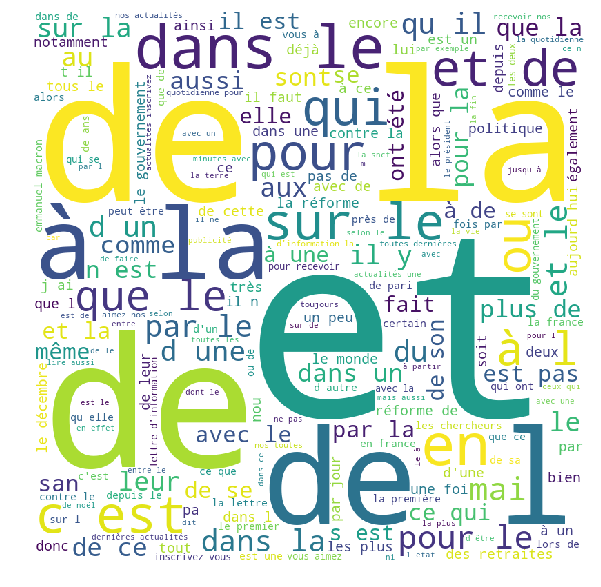

In [33]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

##### StopWords

In [34]:
#Downloading nltk data

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('french')
#print(stop_words)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


##### Lemmatisation

In [35]:
from nltk.stem import WordNetLemmatizer

##### Cleaning 

In [36]:


lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning the punctuation
    
    words = nltk.word_tokenize(sentence) #tokenization the words of the sentences
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence
train.head()

for index,row in test.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning the punctuation
    
    words = nltk.word_tokenize(sentence) #tokenization the words of the sentences
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    test.loc[index,'total'] = filter_sentence
test.head()


,id,author,title,text,label,total
0,0,ecomatin,Région de l’Est : 35% d’enfants atteints de ma...,La révélation est faite par plusieurs enquêtes...,0,région lest 35 denfants atteints malnutrition...
1,1,ecomatin,"Inflation : Bertoua, ville la plus chère de 20...",C’est l’une des principales informations de la...,0,inflation bertoua ville plus chère 2016 2021 ...
2,2,ecomatin,"CHR de Bertoua : un chantier de 8,9 milliards ...",C’est le constat fait par le ministre de la Sa...,0,chr bertoua chantier 89 milliard paralysé dep...
3,3,ecomatin,"À l’Est, la DGI table sur des recettes fiscale...",L’objectif visé par cette entité publique est ...,0,à lest dgi table recettes fiscales 12 milliar...
4,4,ecomatin,La région de l’Est a collecté près de 250 mill...,Cette somme est constituée des taxes issues de...,0,la région lest a collecté près 250 million re...


In [37]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

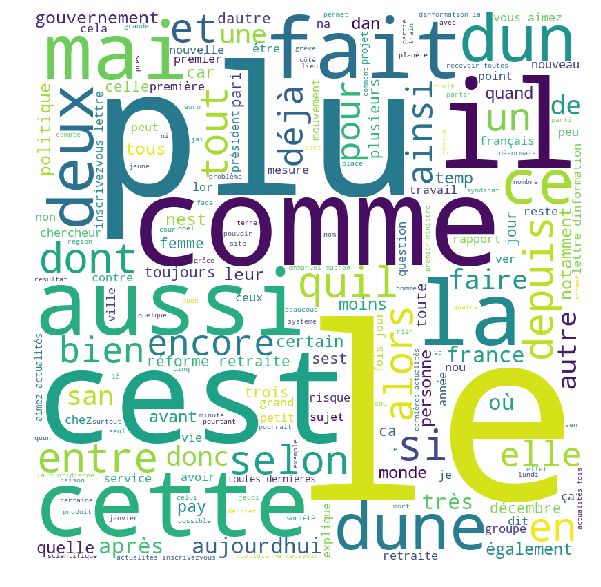

In [38]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Applying NLP Techniques

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
X_train = train['total']
Y_train = train['label']
#print(X_train)

In [41]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

#### Confusion Matrix

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Modelling

In [43]:
#test_counts = count_vectorizer.transform(test['total'].values)
#test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0,test_size=0.3)

## Logistic Regression

##### evaluation the regularisation parameters C 

In [44]:
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.metrics import accuracy_score
cs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]
response=[]
for c in cs:
     logreg = LogisticRegression(C=c,n_jobs=-1,solver='saga',max_iter=500)
     #logreg = LogisticRegression(C=1e5)
     logreg.fit(X_train, y_train)
     pred = logreg.predict(X_test)
     pred2 = logreg.predict(X_train)
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of Logistic classifier on training set: {:.2f}'
          .format(accuracy_score(y_train, pred2)))
     print('Accuracy of Logistic classifier on test set: {:.2f}'
          .format(accuracy_score(y_test, pred)))
     print('\n')
     print('\n')
     cm1 = confusion_matrix(y_test, pred)
     cm1
     """
     response.append({
          'train accuracy_score':accuracy_score(y_train, pred2),
          'test accuracy_score':accuracy_score(y_test, pred),
          'C regularisation':c})
     """
##a supprime
#plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])
"""
Plot non-normalized confusion matrix
ax = plot_confusion_matrix(
df_news[df_news["train"] == False]["fake"], y_test_pred, 
                         classes=np.array([0,1]),
                         title='Confusion matrix',
                         size=5)
"""

regularisation parameter C is :0.001
Accuracy of Logistic classifier on training set: 0.56
Accuracy of Logistic classifier on test set: 0.56




regularisation parameter C is :0.003
Accuracy of Logistic classifier on training set: 0.56
Accuracy of Logistic classifier on test set: 0.56




regularisation parameter C is :0.01
Accuracy of Logistic classifier on training set: 0.56
Accuracy of Logistic classifier on test set: 0.56




regularisation parameter C is :0.03
Accuracy of Logistic classifier on training set: 0.56
Accuracy of Logistic classifier on test set: 0.56




regularisation parameter C is :0.1
Accuracy of Logistic classifier on training set: 0.80
Accuracy of Logistic classifier on test set: 0.71




regularisation parameter C is :0.3
Accuracy of Logistic classifier on training set: 0.98
Accuracy of Logistic classifier on test set: 0.93




regularisation parameter C is :1
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.96

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :100
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :300
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97




regularisation parameter C is :1000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :3000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :10000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :30000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :100000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :300000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


regularisation parameter C is :1000000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98




regularisation parameter C is :3000000
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


'\nPlot non-normalized confusion matrix\nax = plot_confusion_matrix(\ndf_news[df_news["train"] == False]["fake"], y_test_pred, \n                         classes=np.array([0,1]),\n                         title=\'Confusion matrix\',\n                         size=5)\n'

In [45]:
logreg = LogisticRegression(C=3,n_jobs=-1,solver='saga',max_iter=500)
     #logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

## Naive Baiyes

##### evaluation the regularisation parameters alpha

In [46]:
from sklearn.naive_bayes import MultinomialNB
cs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]
for c in cs:
     bayes = MultinomialNB(alpha=c)
     bayes.fit(X_train, y_train)
     pred = bayes.predict(X_test)
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of NB  classifier on training set: {:.2f}'
          .format(bayes.score(X_train, y_train)))
     print('Accuracy of NB classifier on test set: {:.2f}'
          .format(bayes.score(X_test, y_test)))
     print('\n')
     """
     cm2 = confusion_matrix(y_test, pred)
     cm2
     """
##a supprime
#plot_confusion_matrix(cm2, classes=['fake','Real'])

regularisation parameter C is :0.001
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.85


regularisation parameter C is :0.003
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.88


regularisation parameter C is :0.01
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.91


regularisation parameter C is :0.03
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.92


regularisation parameter C is :0.1
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.91


regularisation parameter C is :0.3
Accuracy of NB  classifier on training set: 0.97
Accuracy of NB classifier on test set: 0.79


regularisation parameter C is :1
Accuracy of NB  classifier on training set: 0.77
Accuracy of NB classifier on test set: 0.63


regularisation parameter C is :3
Accuracy of NB  classifier on training set: 0.60
Accu

In [47]:
bayes = MultinomialNB(alpha=0.03)
bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.03, class_prior=None, fit_prior=True)

## Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
depthSize=[2,3,5,7,9,11,12,15,17,18,20,22,24,26,28]
for c in depthSize:
     Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=c),n_estimators=5)
     Adab.fit(X_train, y_train)
     pred = Adab.predict(X_test)
     
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of Adaboost classifier on training set: {:.2f}'
          .format(Adab.score(X_train, y_train)))
     print('Accuracy of Adaboost classifier on test set: {:.2f}'
          .format(Adab.score(X_test, y_test)))
     print('\n')
     """
     cm3 = confusion_matrix(y_test, pred)
     cm3
     """
##a supprime
#plot_confusion_matrix(cm3, classes=['fake','Real'])


regularisation parameter C is :2
Accuracy of Adaboost classifier on training set: 0.91
Accuracy of Adaboost classifier on test set: 0.89


regularisation parameter C is :3
Accuracy of Adaboost classifier on training set: 0.96
Accuracy of Adaboost classifier on test set: 0.91


regularisation parameter C is :5
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.89


regularisation parameter C is :7
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.87


regularisation parameter C is :9
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.86


regularisation parameter C is :11
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.89


regularisation parameter C is :12
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.89


regularisation parameter 

In [49]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=17),n_estimators=5)
Adab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)

##### training the different in the dataset which is for cameroon 

In [50]:
#print('bonjour')
#logistic regression
#print(test['total'].values)

#Feature extraction using count vectorization and tfidf.

freq_term_matrix2 = count_vectorizer.transform(test['total'])
#print(freq_term_matrix2.)
testInput = tfidf.transform(freq_term_matrix2)
#print(testInput)
pred1=logreg.predict(testInput)
print('accuracy of logistic regression: {:.2f}'
     .format(accuracy_score(pred1, test['label'])))

#naive bayes
pred2=bayes.predict(testInput)
print('accuracy of naive bayes: {:.2f}'
     .format(accuracy_score(pred2, test['label'])))

#Decision Tree
pred3=Adab.predict(testInput)
print('accuracy of Decision Tree: {:.2f}'
     .format(accuracy_score(pred3, test['label'])))

bonjour
  (0, 58546)	0.035213858289493964
  (0, 58518)	0.0077092477784837425
  (0, 58500)	0.048095816792503576
  (0, 58271)	0.015635744316847604
  (0, 57890)	0.032585194651485204
  (0, 57797)	0.015842516350355385
  (0, 57717)	0.009776254764614084
  (0, 57406)	0.02122754406699347
  (0, 57348)	0.014242658308072174
  (0, 57319)	0.028596127471457726
  (0, 56703)	0.025921396325929078
  (0, 56589)	0.05719225494291545
  (0, 56372)	0.0528733402318688
  (0, 56148)	0.013132544582188727
  (0, 56140)	0.01801971544453148
  (0, 55834)	0.018344177173185545
  (0, 55786)	0.019256359239094092
  (0, 55715)	0.019615578551973586
  (0, 55343)	0.05012065044782629
  (0, 55264)	0.01665708516416771
  (0, 54510)	0.030752459973599468
  (0, 54374)	0.01625301932382512
  (0, 54304)	0.02033799444930307
  (0, 54180)	0.009005913647941528
  (0, 54105)	0.028560982600386284
  :	:
  (310, 12967)	0.08056341998750073
  (310, 12957)	0.06973345944750688
  (310, 11779)	0.18450151497976483
  (310, 11758)	0.052279970555171494
  (

In [51]:
"""
def unique_list(l):
    ulist = []
[ulist.append(x) for x in l if x not in ulist]
return ulist

#a="Une rÃ©action forte du gouvernement Ã©tait attendue, au regard du caractÃ¨re sensible du dossier. Depuis le 21 fÃ©vrier dernier en effet, certains enseignants et syndicats dâ€™enseignants du secondaire sont entrÃ©s en grÃ¨ve. Une situation qui a privÃ©, pendant plusieurs jours, des dizaines de milliers dâ€™Ã©lÃ¨ves de leur droit fondamental : lâ€™Ã©ducation. A lâ€™issue dâ€™une sÃ©rie de nÃ©gociations avec les parties prenantes, le chef de lâ€™Etat a instruit huit mesures destinÃ©es Ã  apporter une rÃ©ponse adÃ©quate et urgente aux diverses revendications exprimÃ©es. En application de ces directives, un point de presse destinÃ© Ã  mieux expliquer ce qui sera concrÃ¨tement fait dans les jours qui viennent sâ€™est tenu, hier 9 mars, Ã  YaoundÃ©. Pas moins de cinq membres du gouvernement se sont ainsi mobilisÃ©s pour la circonstance : le ministre de la Communication, RenÃ© Emmanuel Sadi ; le ministre des Finances, Louis Paul Motaze ; le ministre de la Fonction publique et de la RÃ©forme administrative, Joseph LE ; le ministre des... Une rÃ©action forte du gouvernement Ã©tait attendue, au regard du caractÃ¨re sensible du dossier. Depuis le 21 fÃ©vrier dernier en effet, certains enseignants et syndicats dâ€™enseignants du secondaire sont entrÃ©s en grÃ¨ve. Une situation qui a privÃ©, pendant plusieurs jours, des dizaines de milliers dâ€™Ã©lÃ¨ves de leur droit fondamental : lâ€™Ã©ducation. A lâ€™issue dâ€™une sÃ©rie de nÃ©gociations avec les parties prenantes, le chef de lâ€™Etat a instruit huit mesures destinÃ©es Ã  apporter une rÃ©ponse adÃ©quate et urgente aux diverses revendications exprimÃ©es. En application de ces directives, un point de presse destinÃ© Ã  mieux expliquer ce qui sera concrÃ¨tement fait dans les jours qui viennent sâ€™est tenu, hier 9 mars, Ã  YaoundÃ©. Pas moins de cinq membres du gouvernement se sont ainsi mobilisÃ©s pour la circonstance : le ministre de la Communication, RenÃ© Emmanuel Sadi ; le ministre des Finances, Louis Paul Motaze ; le ministre de la Fonction publique et de la RÃ©forme administrative, Joseph LE ; le ministre des..."
#a="Some military personnel who were promoted to different ranks by a Presidential decree and Ministerial decision of December 21, 2021 and December 27, 2021 respectively, received their medals on January 1, 2022. This was in a ceremony at the General Headquarters Brigade presided at by the Commander, Colonel Matian Charles Alain. The about 60 officers of various categories were awarded epaulets in recognition of their services to the nation. On an individual basis, the Commander of the General Headquarters Brigade congratulated each beneficiary for the medal received and encouraged them to continue in safeguarding the territorial integrity of the country through the protection of persons and property.Â In appreciation to his epaulet, Emmanuel Nyenti promoted to the rank of Lieutenant of the land forces said he is very grateful for his promotion. â€œI have been serving in the military for the past 21 years and I thank God for this recognition. My gratitude goes to my hierarchy for their constant guidance and to my dear wife for the moral support. At the same time, this epaulet is a call to more devotion and loyalty to the State and its institutions,â€ he said.On his part, Formikong Azeh, promoted from ... Some military personnel who were promoted to different ranks by a Presidential decree and Ministerial decision of December 21, 2021 and December 27, 2021 respectively, received their medals on January 1, 2022. This was in a ceremony at the General Headquarters Brigade presided at by the Commander, Colonel Matian Charles Alain. The about 60 officers of various categories were awarded epaulets in recognition of their services to the nation.On an individual basis, the Commander of the General Headquarters Brigade congratulated each beneficiary for the medal received and encouraged them to continue in safeguarding the territorial integrity of the country through the protection of persons and property.Â In appreciation to his epaulet, Emmanuel Nyenti promoted to the rank of Lieutenant of the land forces said he is very grateful for his promotion. â€œI have been serving in the military for the past 21 years and I thank God for this recognition. My gratitude goes to my hierarchy for their constant guidance and to my dear wife for the moral support. At the same time, this epaulet is a call to more devotion and loyalty to the State and its institutions,â€ he said.On his part, Formikong Azeh, promoted from ..."
a="La Coupe dâ€™Afrique des nations (CAN) TotalEnergies 2021 nâ€™avait pas encore commencÃ© que le sujet animait dÃ©jÃ  les dÃ©bats. Que vont devenir les infrastructures sportives ultra modernes construites et rÃ©habilitÃ©es Ã  coup de centaines de milliards de F, aprÃ¨s cette fÃªte continentale du football ? La question se pose dâ€™autant plus que certains exemples venus dâ€™ailleurs prÃ©sentent parfois un spectacle dâ€™abandon et de dÃ©solation aprÃ¨s lâ€™organisation dâ€™un Ã©vÃ¨nement dâ€™une telle envergure. Faisant le bilan de la CAN 2021, CT a adressÃ© cette prÃ©occupation au ministre des Sports et de lâ€™Education physique (Minsep) dans son Ã©dition du mardi 8 fÃ©vrier 2022. Â« A travers une rÃ©flexion profonde prescrite par le Gouvernement et qui est suffisamment avancÃ©e, il est envisagÃ© la mise en place dâ€™une structure autonome et pÃ©renne chargÃ©e dâ€™assurer la gestion de lâ€™ensemble des infrastructures, pour Ã©viter que celles-ci ne deviennent de simples Ã©lÃ©phants blancs, faute dâ€™une gestion efficiente Â», rassure Narcisse Mouelle Kombi.Sur le point spÃ©cifique de lâ€™entretien de ces infrastructures, le ministre ajoute que Â« dans les contrats signÃ©s avec les partenaires en charge de leur construction ou de leur rÃ©habilitation, un volet important Ã©tait consacrÃ© au transfert de technologies, avec la formation des cadres camerounais chargÃ©s dâ€™assurer leur maintenance aprÃ¨s le dÃ©part des entreprises adjudicataires, Ã  lâ€™issue des diverses garanties contractuelles Â». Des mesures sont Ã©galement prÃ©vues pour assurer leur rentabilisation. Il est en effet question dâ€™en faire de vÃ©ritables centres de vie, au lieu de simples espaces rÃ©servÃ©s aux rencontres sportives uniquement. Au complexe dâ€™OlembÃ© par exemple, des concessionnaires professionnels, Ã  la notoriÃ©tÃ© Ã©tablie, sont appelÃ©s Ã  sâ€™occuper des volets spÃ©cifiques de leurs champs dâ€™activitÃ©s (salles de cinÃ©ma, hÃ´tel, mus&eacut... La Coupe dâ€™Afrique des nations (CAN) TotalEnergies 2021 nâ€™avait pas encore commencÃ© que le sujet animait dÃ©jÃ  les dÃ©bats. Que vont devenir les infrastructures sportives ultra modernes construites et rÃ©habilitÃ©es Ã  coup de centaines de milliards de F, aprÃ¨s cette fÃªte continentale du football ? La question se pose dâ€™autant plus que certains exemples venus dâ€™ailleurs prÃ©sentent parfois un spectacle dâ€™abandon et de dÃ©solation aprÃ¨s lâ€™organisation dâ€™un Ã©vÃ¨nement dâ€™une telle envergure. Faisant le bilan de la CAN 2021, CT a adressÃ© cette prÃ©occupation au ministre des Sports et de lâ€™Education physique (Minsep) dans son Ã©dition du mardi 8 fÃ©vrier 2022. Â« A travers une rÃ©flexion profonde prescrite par le Gouvernement et qui est suffisamment avancÃ©e, il est envisagÃ© la mise en place dâ€™une structure autonome et pÃ©renne chargÃ©e dâ€™assurer la gestion de lâ€™ensemble des infrastructures, pour Ã©viter que celles-ci ne deviennent de simples Ã©lÃ©phants blancs, faute dâ€™une gestion efficiente Â», rassure Narcisse Mouelle Kombi.Sur le point spÃ©cifique de lâ€™entretien de ces infrastructures, le ministre ajoute que Â« dans les contrats signÃ©s avec les partenaires en charge de leur construction ou de leur rÃ©habilitation, un volet important Ã©tait consacrÃ© au transfert de technologies, avec la formation des cadres camerounais chargÃ©s dâ€™assurer leur maintenance aprÃ¨s le dÃ©part des entreprises adjudicataires, Ã  lâ€™issue des diverses garanties contractuelles Â». Des mesures sont Ã©galement prÃ©vues pour assurer leur rentabilisation. Il est en effet question dâ€™en faire de vÃ©ritables centres de vie, au lieu de simples espaces rÃ©servÃ©s aux rencontres sportives uniquement. Au complexe dâ€™OlembÃ© par exemple, des concessionnaires professionnels, Ã  la notoriÃ©tÃ© Ã©tablie, sont appelÃ©s Ã  sâ€™occuper des volets spÃ©cifiques de leurs champs dâ€™activitÃ©s (salles de cinÃ©ma, hÃ´tel, mus&eacut..."
print(a)
print('\n')
a=' '.join(unique_list(a.split()))
print(a)
"""

'\ndef unique_list(l):\n    ulist = []\n[ulist.append(x) for x in l if x not in ulist]\nreturn ulist\n\n#a="Une rÃ©action forte du gouvernement Ã©tait attendue, au regard du caractÃ¨re sensible du dossier. Depuis le 21 fÃ©vrier dernier en effet, certains enseignants et syndicats dâ€™enseignants du secondaire sont entrÃ©s en grÃ¨ve. Une situation qui a privÃ©, pendant plusieurs jours, des dizaines de milliers dâ€™Ã©lÃ¨ves de leur droit fondamental : lâ€™Ã©ducation. A lâ€™issue dâ€™une sÃ©rie de nÃ©gociations avec les parties prenantes, le chef de lâ€™Etat a instruit huit mesures destinÃ©es Ã\xa0 apporter une rÃ©ponse adÃ©quate et urgente aux diverses revendications exprimÃ©es. En application de ces directives, un point de presse destinÃ© Ã\xa0 mieux expliquer ce qui sera concrÃ¨tement fait dans les jours qui viennent sâ€™est tenu, hier 9 mars, Ã\xa0 YaoundÃ©. Pas moins de cinq membres du gouvernement se sont ainsi mobilisÃ©s pour la circonstance : le ministre de la Communication, RenÃ© 

##### CAMEMBERT model

In [3]:
#from transformers import BertTokenizer, BertForSequenceClassification
from transformers import CamembertModel, CamembertTokenizer
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch.nn.functional as F

ImportError: cannot import name 'CamembertModel' from 'transformers' (C:\ProgramData\Anaconda3\lib\site-packages\transformers\__init__.py)

In [ ]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-large")
camembert = CamembertModel.from_pretrained("camembert/camembert-large")
#model.config.num_labels = 1
from transformers import pipeline 

camembert_fill_mask  = pipeline("fill-mask", model="camembert/camembert-large", tokenizer="camembert/camembert-large")
results = camembert_fill_mask("Le camembert est <mask> :)")

In [ ]:
import torch
# Tokenize in sub-words with SentencePiece
tokenized_sentence = tokenizer.tokenize("J'aime le camembert !")
# ['▁J', "'", 'aime', '▁le', '▁cam', 'ember', 't', '▁!']

# 1-hot encode and add special starting and end tokens 
encoded_sentence = tokenizer.encode(tokenized_sentence)
# [5, 133, 22, 1250, 16, 12034, 14324, 81, 76, 6]
# NB: Can be done in one step : tokenize.encode("J'aime le camembert !")

# Feed tokens to Camembert as a torch tensor (batch dim 1)
encoded_sentence = torch.tensor(encoded_sentence).unsqueeze(0)
embeddings, _ = camembert(encoded_sentence)

In [12]:
"""from spacy_langdetect import LanguageDetector
import spacy
nlp = spacy.load('en')  # 1
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2
text_content = "Er lebt mit seinen Eltern und seiner Schwester in Berlin."
doc = nlp(text_content) #3
detect_language = doc._.language #4
print(detect_language)"""

#fdfdf
"""import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)"""

from langdetect import detect
if detect("The Flames of Malawi will challenge the Teranga Lions of Senegal today January 18, 2022 in their third and last group B fixture at the ongoing 33rd edition of the TotalEnergies Africa Cup of Nations at the Bafoussam Omnisports Stadium. From all indications, todayâ€™s game will produce a lot of fireworks as the winner of the game will secure a place in the next round of the competition. Senegal are second in the group with four points. A victory for the Teranga Lions will propel them to the round of 16. That means Senegal will likely face a weaker opponent in the round of 16. Senegal beat the Warriors of Zimbabwe 1-0 and drew 0-0 with the Silly National of Guinea.Â  A win for Malawi will give them their first chance to reach the second round of the competition. Malawi will have a full squad for todayâ€™s game despite the absence of team captain Limbikani Mzava who has replaced. The Flames have never qualified for the knockout stage of the competition and are expected to put up a good fight against Senegal in their last group game. Senegal had been hit by Covid-19. IsmaÃ¯la Sarr was in Barcelona last week for an update on his ongoing injury and will be monitored ah... The Flames of Malawi will challenge the Teranga Lions of Senegal today January 18, 2022 in their third and last group B fixture at the ongoing 33rd edition of the TotalEnergies Africa Cup of Nations at the Bafoussam Omnisports Stadium. From all indications, todayâ€™s game will produce a lot of fireworks as the winner of the game will secure a place in the next round of the competition. Senegal are second in the group with four points. A victory for the Teranga Lions will propel them to the round of 16. That means Senegal will likely face a weaker opponent in the round of 16. Senegal beat the Warriors of Zimbabwe 1-0 and drew 0-0 with the Silly National of Guinea.Â  A win for Malawi will give them their first chance to reach the second round of the competition. Malawi will have a full squad for todayâ€™s game despite the absence of team captain Limbikani Mzava who has replaced. The Flames have never qualified for the knockout stage of the competition and are expected to put up a good fight against Senegal in their last group game. Senegal had been hit by Covid-19. IsmaÃ¯la Sarr was in Barcelona last week for an update on his ongoing injury and will be monitored ah...") == 'en':
    print('english')
else:
    print('not english')

english
